In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/책공부/혼자공부하는머신러닝+딥러닝/8_2_best-cnn-model.h5')
# 모델 전체를 불러오기

In [6]:
model.layers # 파이썬 리스트 형태

In [7]:
# 가중치weights[0]와 절편weights[1] 크기 출력하기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
#  커널크기가(3,3,1)인 커널이 32개 존재 , 커널당 하나의 절편이 존재

(3, 3, 1, 32) (32,)


In [8]:
# weights 속성은 텐서플로의 다차원배열인 Tensor클래스의 객체, 다루기 쉽도록 numpy()메서드를 사용해 넘파이 배열로 변환하기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
# weights의 평균값과 표준편차

-0.042357486 0.28736135


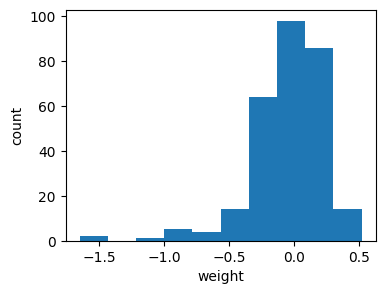

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 가중치의 분포를 시각화

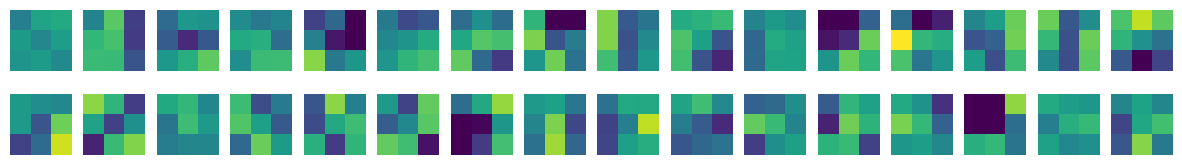

In [18]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    # imshow할 때에는 깊이가 0/ vmin, vmax: colorbar의 최솟값과 최댓값을 조정
    axs[i,j].axis('off')
plt.show()

In [23]:
# 학습하지 않은 가중치와의 비교
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [24]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [25]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())
# 훈련안한 가중치의 평균과 표준편차 , 표준편차가 적다 -> 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택

-0.005492028 0.08174833


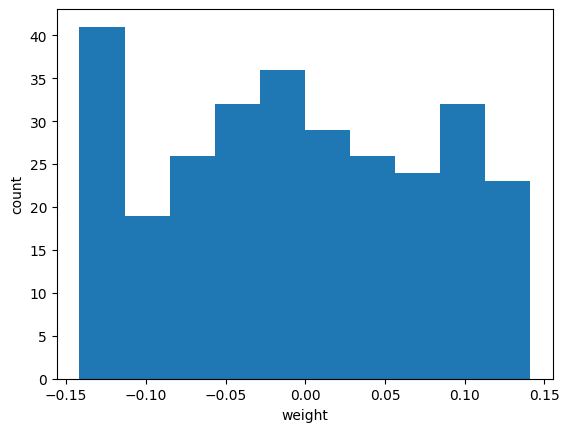

In [26]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

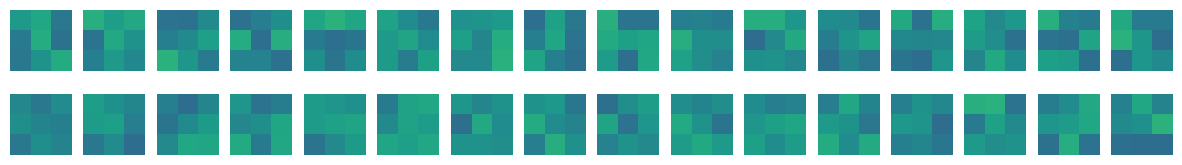

In [27]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [28]:
# 함수형 API: 층을 함수처럼 호출하여 값을 만드는 방법/ 특성맵을 시각화하기 위해 필요
print(model.input) # model.input으로 이 모델의 입력을 얻을 수 있다

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [29]:
conv_acti = keras.Model(model.input, model.layers[0].output)
# 첫 번째 Conv2D의 출력을 반환

4422102/4422102 [==============================] - 1s 0us/step


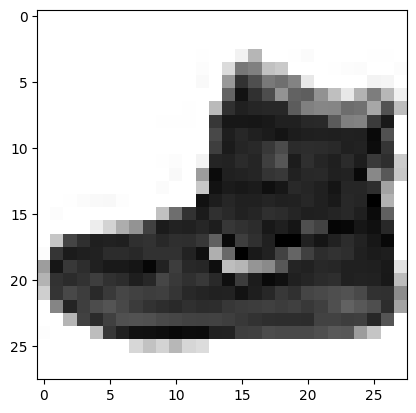

In [30]:
# 특성맵 시각화
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [31]:
# predict메서드를 사용할 때는 첫번째 차원이 배치차원
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 341ms/step


In [32]:
print(feature_maps.shape)

(1, 28, 28, 32)


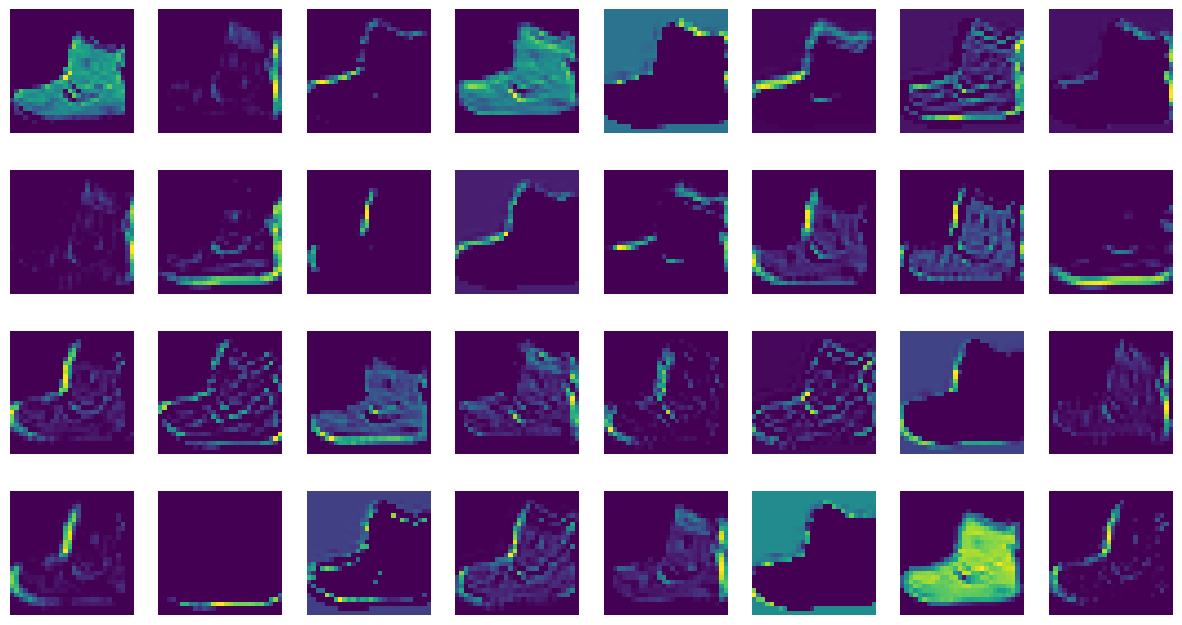

In [34]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()
# 시각적으로 어느 부분을 가중치가 강하게 활성화 하였는지 알 수 있다.

In [35]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
# 두 번째 합성곱 층이 만든 특성 맵 확인해보기

In [36]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 149ms/step


In [37]:
print(feature_maps.shape)

(1, 14, 14, 64)


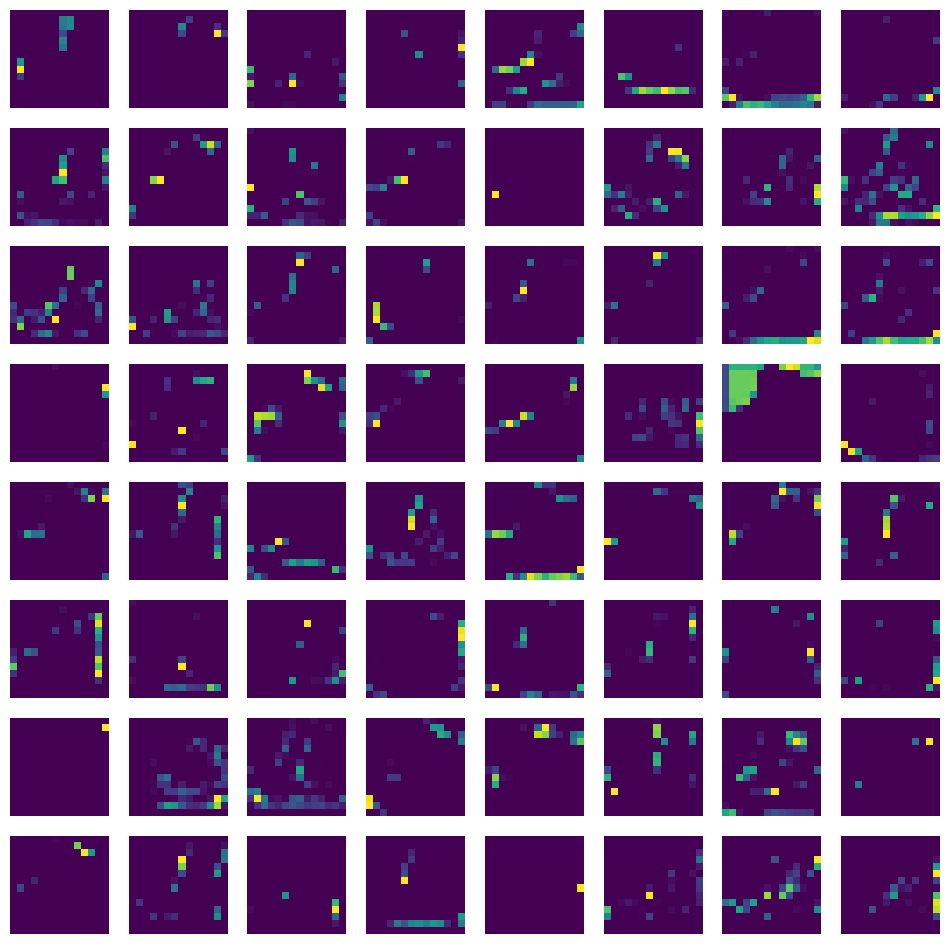

In [38]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()
# 시각적으로 어떤 부위를 감지하는지 직관적으로 이해하기가 어렵다 -> 합성곱 신경망이 뒤쪽으로 갈수록 추상적인 정보를 찾아 학습함